In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [3]:
width = 345
tex_fonts = {
    # Use LaTeX to write all text
    #"text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 12,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 11,
    "xtick.labelsize": 8.5,
    "ytick.labelsize": 8.5
}

plt.rcParams.update(tex_fonts)

# Pair1Elim

## 0. Regret curve

In [4]:
horizon = 200000 
ticks = np.linspace(horizon/10, horizon, num=10)

pair_elim = {}
pair_elim['mean'] = np.array([14229.685719  , 15644.1312313 , 15644.1312313 , 17572.54738183,
       17572.54738183, 17572.54738183, 17572.54738183, 17572.54738183,
       17572.54738183, 17572.54738183])
pair_elim['5pct'] = np.array([12371.155281  , 12371.155281  , 12371.155281  , 14166.44280538,
       14166.44280538, 14166.44280538, 14166.44280538, 14166.44280538,
       14166.44280538, 14166.44280538])
pair_elim['95pct'] = np.array([14730.04556037, 18245.1991872 , 18245.1991872 , 20720.08302884,
       20720.08302884, 20720.08302884, 20720.08302884, 20720.08302884,
       20720.08302884, 20720.08302884])

rank1elim = {}
rank1elim['mean'] = np.array([14633.35813958, 29211.4247638 , 36173.27499828, 36173.27499828,
       36173.27499828, 36173.27499828, 36173.27499828, 36173.27499828,
       36173.27499828, 36173.27499828])
rank1elim['5pct'] = np.array([14489.1923854 , 28726.00715747, 34192.96110515, 34192.96110515,
       34192.96110515, 34192.96110515, 34192.96110515, 34192.96110515,
       34192.96110515, 34192.96110515])
rank1elim['95pct'] = np.array([14699.93638046, 29385.39216507, 36728.25801258, 36728.25801258,
       36728.25801258, 36728.25801258, 36728.25801258, 36728.25801258,
       36728.25801258, 36728.25801258])

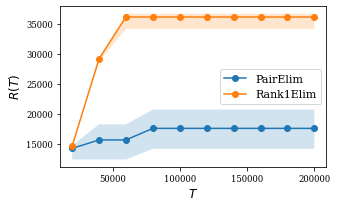

In [5]:
fig, ax0 = plt.subplots(1, 1, figsize=set_size(width))
# PairElim
ax0.plot(
    ticks,
    pair_elim['mean'],
    marker='o',
    label='PairElim'
)
ax0.fill_between(
    ticks,
    pair_elim['5pct'],
    pair_elim['95pct'],
    alpha=0.2
)

# Rank1Elim
ax0.plot(
    ticks,
    rank1elim['mean'],
    marker='o',
    label='Rank1Elim'
)
ax0.fill_between(
    ticks,
    rank1elim['5pct'],
    rank1elim['95pct'],
    alpha=0.2
)
ax0.set_ylabel(r"$R(T)$")
ax0.set_xlabel(r"$T$")
ax0.legend(loc='center right') # lower right
plt.xticks([50000, 100000, 150000, 200000])
plt.show()
fig.savefig('../figures/comparison.pdf', format='pdf', bbox_inches='tight')

## 1. Varying $u_1$, $\Delta$ fixed

In [6]:
p_max = np.linspace(0.3, 0.9, num=7)
pair_elim = {}
pair_elim['mean'] = np.array([176498, 107310, 66089, 38424, 28451, 19566, 13354])
pair_elim['5pct'] = np.array([169345, 90661, 60903, 30099, 28001, 17543, 11343])
pair_elim['95pct'] = np.array([188512, 123339, 71296, 44492, 30032, 21784, 15271])
rank1elim = {}
rank1elim['mean'] = np.array([252706, 117424, 85838, 56813, 36797, 38762, 22219])
rank1elim['5pct'] = np.array([252667, 105741, 71271, 51962, 36473, 32638, 16854])
rank1elim['95pct'] = np.array([252755, 125465, 98753, 62853, 36888, 43471, 26760])
ratio = {}
ratio['mean'] = rank1elim['mean'] / pair_elim['mean']
ratio['5pct'] = rank1elim['5pct'] / pair_elim['95pct']
ratio['95pct'] = rank1elim['95pct'] / pair_elim['5pct']

### Regret

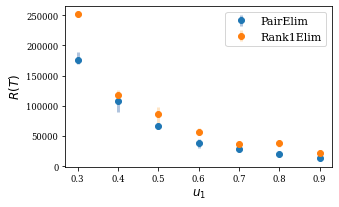

In [7]:
fig , ax1 = plt.subplots(1, 1, figsize=set_size(width))
## plot Pair-Elim
ax1.errorbar(p_max, 
             pair_elim['mean'],
             yerr=[pair_elim['mean'] - pair_elim['5pct'],
                  pair_elim['95pct'] - pair_elim['mean']],
             label='PairElim',
             fmt='o', color='C0', ecolor='lightsteelblue', elinewidth=3, capsize=0)
## plot Rank1Elim
ax1.errorbar(p_max, 
             rank1elim['mean'],
             yerr=[rank1elim['mean'] - rank1elim['5pct'],
                  rank1elim['95pct'] - rank1elim['mean']],
             label='Rank1Elim',
             fmt='o', color='C1', ecolor='bisque', elinewidth=3, capsize=0)
## axes
ax1.set_ylabel(r"$R(T)$")
ax1.set_xlabel(r"$u_1$")
ax1.legend(loc=1) # lower right
plt.show()
fig.savefig('../figures/p_bar_regret.pdf', format='pdf', bbox_inches='tight')

### Ratio

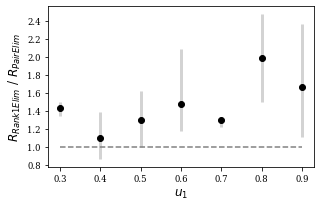

In [8]:
# Ratio
fig , ax2 = plt.subplots(1, 1, figsize=set_size(width))
## plot Pair-Elim
ax2.errorbar(p_max, 
             ratio['mean'],
             yerr=[ratio['mean'] - ratio['5pct'],
                  ratio['95pct'] - ratio['mean']],
             fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
ax2.plot(p_max, [1]*len(p_max), linestyle='--', color='grey')
ax2.set_ylabel(r'$R_{Rank1Elim}$ / $R_{PairElim}$')
ax2.set_xlabel(r"$u_1$")

plt.show()
fig.savefig('../figures/p_bar_ratio.pdf', format='pdf', bbox_inches='tight')

## 2. Varying $\Delta$, $u_1$ fixed

In [9]:
gamma = np.linspace(0.1, 0.8, num=8)
u1 = 0.9
delta = (u1+gamma) / 2

pair_elim = {}
pair_elim['mean'] = np.array([15332, 15556, 15484, 15175, 17276, 18755, 19771, 19604])
pair_elim['5pct'] = np.array([13230, 14263, 13590, 13638, 13405, 15214, 17769, 17534])
pair_elim['95pct'] = np.array([17222, 17255, 17530, 17163, 21783, 20884, 22068, 21129])
rank1elim = {}
rank1elim['mean'] = np.array([15921, 20060, 20405, 30139, 34432, 37950, 40339, 45256])
rank1elim['5pct'] = np.array([15368, 18518, 16597, 22022, 28070, 35732, 39579, 40443])
rank1elim['95pct'] = np.array([17539, 23295, 22733, 34471, 38417, 38386, 46582, 57272])
ratio = {}
ratio['mean'] = rank1elim['mean'] / pair_elim['mean']
ratio['5pct'] = rank1elim['5pct'] / pair_elim['95pct']
ratio['95pct'] = rank1elim['95pct'] / pair_elim['5pct']

### Regret

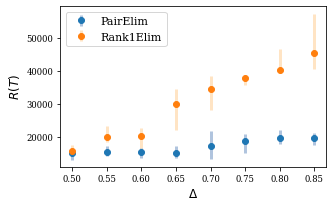

In [10]:
# Regret
fig , ax1 = plt.subplots(1, 1, figsize=set_size(width))
## plot Pair-Elim
ax1.errorbar(delta, 
             pair_elim['mean'],
             yerr=[pair_elim['mean'] - pair_elim['5pct'],
                  pair_elim['95pct'] - pair_elim['mean']],
             label='PairElim',
             fmt='o', color='C0', ecolor='lightsteelblue', elinewidth=3, capsize=0)
## plot Rank1Elim
ax1.errorbar(delta, 
             rank1elim['mean'],
             yerr=[rank1elim['mean'] - rank1elim['5pct'],
                  rank1elim['95pct'] - rank1elim['mean']],
             label='Rank1Elim',
             fmt='o', color='C1', ecolor='bisque', elinewidth=3, capsize=0)
## axes
ax1.set_ylabel(r"$R(T)$")
ax1.set_xlabel(r"$\Delta$")
ax1.legend(loc=2) # lower right
plt.show()
fig.savefig('../figures/delta_regret.pdf', format='pdf', bbox_inches='tight')

### Ratio

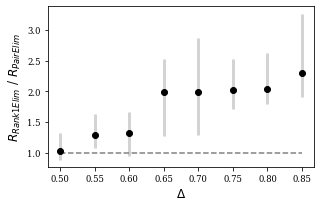

In [11]:
# Ratio
fig , ax2 = plt.subplots(1, 1, figsize=set_size(width))
## plot Pair-Elim
ax2.errorbar(delta, 
             ratio['mean'],
             yerr=[ratio['mean'] - ratio['5pct'],
                  ratio['95pct'] - ratio['mean']],
             fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
ax2.plot(delta, [1]*len(delta), linestyle='--', color='grey')
ax2.set_ylabel(r'$R_{Rank1Elim}$ / $R_{PairElim}$')
ax2.set_xlabel(r"$\Delta$")

plt.show()
fig.savefig('../figures/delta_ratio.pdf', format='pdf', bbox_inches='tight')

## 3. Varying $u_1$, $\mu$ fixed

In [12]:
u1s = np.linspace(0.4, 0.9, num=6)

pair_elim = {}
pair_elim['mean'] = np.array([58838, 55810, 43000, 27791, 18459, 20225])
pair_elim['5pct'] = np.array([55714, 53340, 40965, 24807, 15159, 17939])
pair_elim['95pct'] = np.array([63293, 57449, 45136, 29776, 21497, 22130])
rank1elim = {}
rank1elim['mean'] = np.array([76679, 101346, 95047, 65419, 50280, 44827])
rank1elim['5pct'] = np.array([75737, 96426, 94932, 55888, 38716, 43585])
rank1elim['95pct'] = np.array([84693, 107335, 95647, 73517, 56502, 51977])
ratio = {}
ratio['mean'] = rank1elim['mean'] / pair_elim['mean']
ratio['5pct'] = rank1elim['5pct'] / pair_elim['95pct']
ratio['95pct'] = rank1elim['95pct'] / pair_elim['5pct']

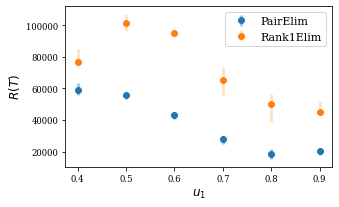

In [13]:
# Regret
fig, ax1 = plt.subplots(1, 1, figsize=set_size(width))
## plot Pair-Elim
ax1.errorbar(u1s, 
             pair_elim['mean'],
             yerr=[pair_elim['mean'] - pair_elim['5pct'],
                  pair_elim['95pct'] - pair_elim['mean']],
             label='PairElim',
             fmt='o', color='C0', ecolor='lightsteelblue', elinewidth=3, capsize=0)
## plot Rank1Elim
ax1.errorbar(u1s, 
             rank1elim['mean'],
             yerr=[rank1elim['mean'] - rank1elim['5pct'],
                  rank1elim['95pct'] - rank1elim['mean']],
             label='Rank1Elim',
             fmt='o', color='C1', ecolor='bisque', elinewidth=3, capsize=0)

## axes
ax1.set_ylabel(r"$R(T)$")
ax1.set_xlabel(r"$u_1$")
ax1.legend(loc=1) # lower right
plt.show()
fig.savefig('../figures/u1_regret.pdf', format='pdf', bbox_inches='tight')

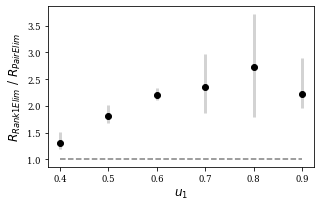

In [14]:
# Ratio
fig, ax2 = plt.subplots(1, 1, figsize=set_size(width))
## plot Pair-Elim
ax2.errorbar(u1s, 
             ratio['mean'],
             yerr=[ratio['mean'] - ratio['5pct'],
                  ratio['95pct'] - ratio['mean']],
             fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
ax2.plot(u1s, [1]*len(u1s), linestyle='--', color='grey')
ax2.set_ylabel(r'$R_{Rank1Elim}$ / $R_{PairElim}$')
ax2.set_xlabel(r"$u_1$")
plt.show()
fig.savefig('../figures/u1_ratio.pdf', format='pdf', bbox_inches='tight')

# Matching selection
## Comparison with ESCB

$u = [0.35, 0.35, 0.45, 0.45, 0.55, 0.55, 0.65, 0.65]$

In [15]:
horizon = 200000
ticks = np.linspace(horizon/10, horizon, num=10)

mdc = {}
mdc['mean'] = np.array([571.5   , 1136.2545, 1497.2615, 1591.6885, 1631.6345, 1634.571 ,
       1634.571 , 1634.571 , 1634.571 , 1634.571])
mdc['5pct'] = np.array([571.5   , 1136.2545, 1331.1485, 1398.3125, 1464.8125, 1502.651 ,
       1502.651 , 1502.651 , 1502.651 , 1502.651])
mdc['95pct'] = np.array([571.5   , 1142.88  , 1638.7435, 1753.816 , 1809.3045, 1809.824 ,
       1809.824 , 1809.824 , 1809.824 , 1809.824 ])

escb = {}
escb['mean'] = np.array([ 527.256 ,  856.8385, 1142.2175, 1412.284 , 1631.4915, 1809.4935,
       1975.9875, 2157.9585, 2311.4455, 2451.1765])
escb['5pct'] = np.array([ 419.5685,  672.338 ,  912.2965, 1162.5485, 1337.93  , 1454.629 ,
       1615.9885, 1775.124 , 1917.2415, 2044.2585])
escb['95pct'] = np.array([ 610.7545    ,  991.1595    , 1332.4475    , 1734.15      ,
       2010.378     , 2203.7245    , 2331.329     , 2455.5295    ,
       2686.88650001, 2823.44600001])

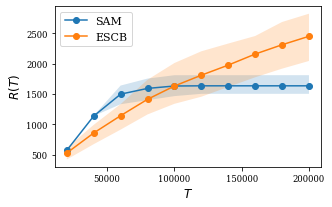

In [16]:
fig, ax0 = plt.subplots(1, 1, figsize=set_size(width))
# PairElim
ax0.plot(
    ticks,
    mdc['mean'],
    marker='o',
    label='SAM'
)
ax0.fill_between(
    ticks,
    mdc['5pct'],
    mdc['95pct'],
    alpha=0.2
)

# Rank1Elim
ax0.plot(
    ticks,
    escb['mean'],
    marker='o',
    label='ESCB'
)
ax0.fill_between(
    ticks,
    escb['5pct'],
    escb['95pct'],
    alpha=0.2
)
ax0.set_ylabel(r"$R(T)$")
ax0.set_xlabel(r"$T$")
ax0.legend(loc=2) # lower right
plt.xticks([50000, 100000, 150000, 200000])
plt.show()
fig.savefig('../figures/matching_comparison.pdf', format='pdf', bbox_inches='tight')

In [17]:
Ns_mdc = [2, 3, 4, 5, 6, 7, 8]
Ns_escb = [2, 3, 4]

scaling_mdc = 1
scaling_escb = 1


mdc = {}
mdc['mean'] = np.array([304, 829, 1634, 2957, 4673, 7002, 9926]) / scaling_mdc
mdc['5pct'] = np.array([254, 730, 1502, 2744, 4311, 6685, 9165]) / scaling_mdc
mdc['95pct'] = np.array([357, 938, 1809, 3142, 4989, 7367, 10687]) / scaling_mdc
escb = {}
escb['mean'] = np.array([2018, 4152, 6211]) / scaling_escb
escb['5pct'] = np.array([1749, 3605, 5646]) / scaling_escb
escb['95pct'] = np.array([2289, 4863, 6998]) / scaling_escb

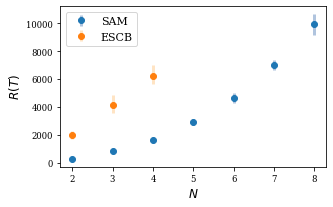

In [18]:
# scaling
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
## plot Pair-Elim
ax.errorbar(Ns_mdc, 
            mdc['mean'],
            yerr=[mdc['mean'] - mdc['5pct'],
                  mdc['95pct'] - mdc['mean']],
            label='SAM',
            fmt='o', color='C0', ecolor='lightsteelblue', elinewidth=3, capsize=0)

ax.errorbar(Ns_escb, 
            escb['mean'],
            yerr=[escb['mean'] - escb['5pct'],
                  escb['95pct'] - escb['mean']],
            label='ESCB',
            fmt='o', color='C1', ecolor='bisque', elinewidth=3, capsize=0)

ax.set_ylabel(r"$R(T)$")
ax.set_xlabel(r"$N$")
plt.xticks(Ns_mdc, Ns_mdc)
ax.legend(loc=2)
plt.show()
#fig.savefig('../figures/matching_N.pdf', format='pdf', bbox_inches='tight')

In [4]:
all_mu = [0.5, 0.6, 0.7, 0.8]
Delta = 0.1
N = 4
scaling = 1



mdc = {}
mdc['mean'] = np.array([1634, 1245, 900, 689]) * scaling
mdc['5pct'] = np.array([1502, 1098, 772, 615]) * scaling
mdc['95pct'] = np.array([1809, 1414, 999, 772]) * scaling
escb = {}
escb['mean'] = np.array([2451, 2376, 2437, 2400]) * scaling
escb['5pct'] = np.array([2044, 2088, 2160, 2071]) * scaling
escb['95pct'] = np.array([2823, 2658, 2831, 2860]) * scaling

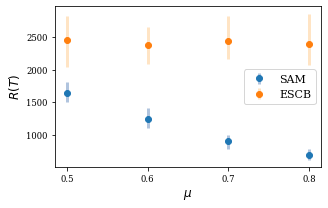

In [6]:
# scaling
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
## plot Pair-Elim
ax.errorbar(all_mu, 
            mdc['mean'],
            yerr=[mdc['mean'] - mdc['5pct'],
                  mdc['95pct'] - mdc['mean']],
            label='SAM',
            fmt='o', color='C0', ecolor='lightsteelblue', elinewidth=3, capsize=0)

ax.errorbar(all_mu, 
            escb['mean'],
            yerr=[escb['mean'] - escb['5pct'],
                  escb['95pct'] - escb['mean']],
            label='ESCB',
            fmt='o', color='C1', ecolor='bisque', elinewidth=3, capsize=0)

ax.set_ylabel(r"$R(T)$")
ax.set_xlabel(r"$\mu$")
plt.xticks(all_mu, all_mu)
ax.legend(loc= 'center right')
plt.show()
fig.savefig('../figures/matching_mu.pdf', format='pdf', bbox_inches='tight')

## Scaling with repect to $N\log N$

origin equal distance

In [21]:
Ns_mdc = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Delta = 0.1
horizon = 200000

scaling_mdc = Delta**2
upper_bound = np.array(Ns_mdc)*(np.log(Ns_mdc)) * np.log(horizon)

mdc = {}

mdc['mean'] = np.array([1333, 4800, 11386, 13281, 14488, 15996, 17759, 19456, 21775, 23252]) * scaling_mdc
mdc['5pct'] = np.array([1333, 4800, 11301, 12656, 13955, 15232, 17033, 18548, 20308, 21993]) * scaling_mdc
mdc['95pct'] = np.array([1333, 4800, 11428, 13659, 14948, 16630, 18487, 20854, 24966, 25586]) * scaling_mdc

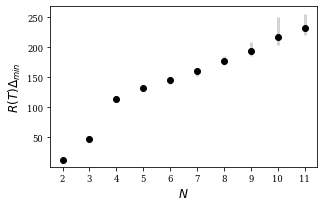

In [22]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
## plot Pair-Elim
ax.errorbar(Ns_mdc, 
            mdc['mean'],
            yerr=[mdc['mean'] - mdc['5pct'],
                  mdc['95pct'] - mdc['mean']],
            label='MDC',
            fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
#ax.plot(Ns_mdc, upper_bound, 'r--', label=r'$N\log N \log T$')
ax.set_ylabel(r'$R(T)\Delta_{min}$')
ax.set_xlabel(r"$N$")
#ax.legend(loc=2)
plt.xticks(Ns_mdc, Ns_mdc)
plt.show()
fig.savefig('../figures/matching_NlogN.pdf', format='pdf', bbox_inches='tight')

## linear spaced parameter values

In [23]:
Ns_mdc = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Ns_escb = [2, 3, 4]

scaling_mdc = (1 / (np.array(Ns_mdc) - 1))**2
scaling_escb = (1 / (np.array(Ns_escb) - 1))**2


mdc = {}
mdc['mean'] = np.array([294, 518, 1230, 2259, 4179, 6104, 8812, 14049, 18707]) * scaling_mdc
mdc['5pct'] = np.array([294, 506, 1143, 2233, 4122, 5928, 8455, 13434, 18505]) * scaling_mdc
mdc['95pct'] = np.array([294, 531, 1285, 2279, 4261, 6347, 9186, 14635, 19007]) * scaling_mdc
escb = {}
escb['mean'] = np.array([30, 241, 888]) * scaling_escb
escb['5pct'] = np.array([30, 227, 819]) * scaling_escb
escb['95pct'] = np.array([30, 262, 917]) * scaling_escb

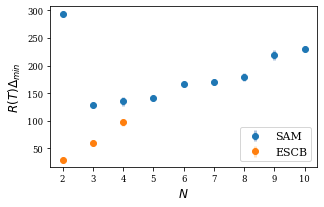

In [24]:
# scaling
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
## plot Pair-Elim
ax.errorbar(Ns_mdc, 
            mdc['mean'],
            yerr=[mdc['mean'] - mdc['5pct'],
                  mdc['95pct'] - mdc['mean']],
            label='SAM',
            fmt='o', color='C0', ecolor='lightsteelblue', elinewidth=3, capsize=0)


ax.errorbar(Ns_escb, 
            escb['mean'],
            yerr=[escb['mean'] - escb['5pct'],
                  escb['95pct'] - escb['mean']],
            label='ESCB',
            fmt='o', color='C1', ecolor='bisque', elinewidth=3, capsize=0)

ax.set_ylabel(r"$R(T)\Delta_{min}$")
ax.set_xlabel(r"$N$")
plt.xticks(Ns_mdc, Ns_mdc)
ax.legend(loc=4)
plt.show()
#fig.savefig('../figures/matching_NlogN_linear_spaced.pdf', format='pdf', bbox_inches='tight')